In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/GodwinRayen/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/GodwinRayen/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [20]:
data= pd.read_csv('athlete_events.csv')


In [21]:
track_data_men = data.loc[data['Event'] == "Athletics Men's 100 metres"]

In [22]:
array = ['Gold', 'Silver','Bronze']
men_winners = track_data_men.loc[track_data_men['Medal'].isin(array)]

This dataset focuses on the Medal winners out the Men's 100m 

In [23]:
men_winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
915,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold
12653,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold
12684,6901,Emmanuel McDonald Bailey,M,31.0,180.0,65.0,Great Britain,GBR,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 100 metres,Bronze
12940,7038,Walter Thane Baker,M,25.0,183.0,72.0,United States,USA,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 100 metres,Silver
14645,7894,Nigel Chase Barker,M,23.0,NaN,NaN,Australia,AUS,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's 100 metres,Bronze


In [28]:
Men_numeric = men_winners[['Age','Height','Weight']]
Men_numeric.describe()

,Age,Height,Weight
count,88.000000,84.000000,84.000000
mean,24.056818,179.583333,74.452381
std,3.178078,6.826963,8.783068
min,18.000000,167.000000,56.000000
25%,22.000000,175.000000,69.000000
50%,23.500000,180.000000,74.000000
75%,26.000000,183.000000,80.000000
max,34.000000,196.000000,95.000000


The basic descriptive statistics of the numerical variables. There were 4 instances in the early olympics that did not record the height and weight of the athletes. This result is interesting as we can see that there is a big difference in weight. When comparing the 25th and 75th percentile for height we see that there is only a 8cm difference whereas with weight that is 11kgs. It shows that most winners are close in height but could have a huge difference in weight. They are also very close in age only being between 22 and 26. Interestingly, the heaviest and tallest athlete is Usain Bolt. There are 30 bronze medals(instead of 29) because in 1896, 2 athletes drew for the bronze medal.

Medal
Bronze    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Gold      [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Silver    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

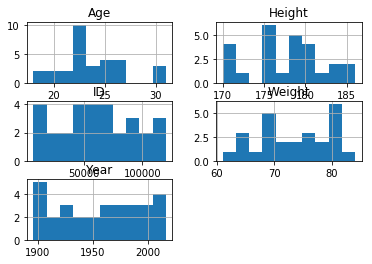

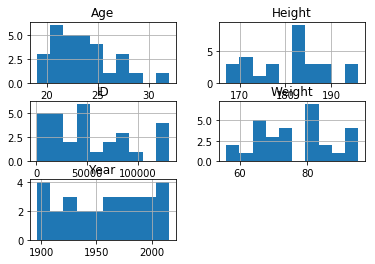

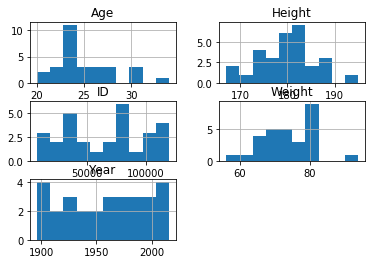

In [8]:
men_winners.groupby('Medal').hist()

The above plots are to see the individual statistics by Medal type. The Year is not very useful, but looking at age we see that the majority for all medal types seem to between 20-25 region. Although bronze medalists tend to be 175-180, Gold and Silver medalists tend to be taller than 180cm. The same applies for weight in that bronze medalists where we see that many are below 70kg and between 70-80kg, but in the other medals they are predominantly 80kg or over. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112fec6a0>,
      dtype=object)

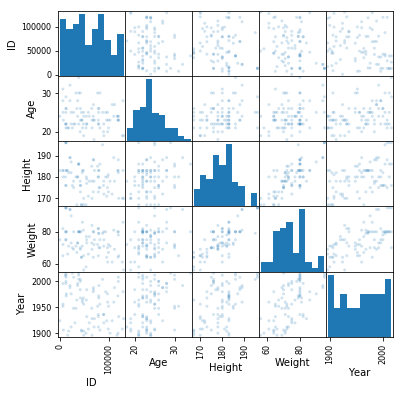

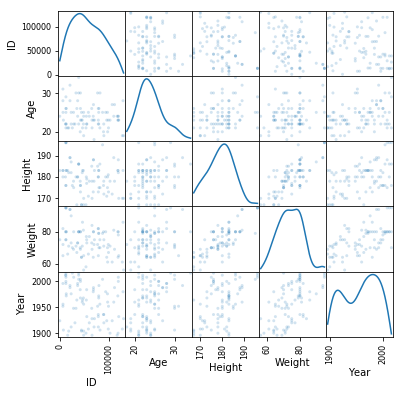

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(men_winners, alpha=0.2, figsize=(6, 6), diagonal='hist')
scatter_matrix(men_winners, alpha=0.2, figsize=(6, 6), diagonal='kde')

Next to see if there is any relationship between the variables. There is no observable patterns, apart from the Height and Weight having a linear relationship.

/Users/GodwinRayen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


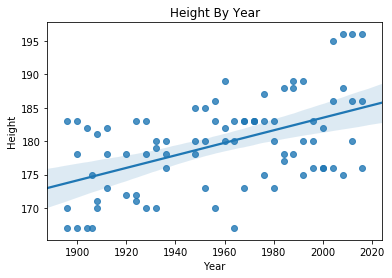

In [15]:
heightplot = sns.regplot(x="Year", y="Height", data=men_winners,)
heightplot.set_title('Height By Year')
heightplot.set_xlabel('Year')
heightplot.set_ylabel('Height')
heightplot


/Users/GodwinRayen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


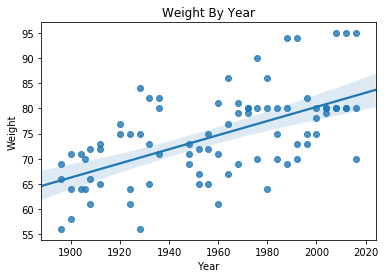

In [16]:
weightplot = sns.regplot(x="Year", y="Weight", data=men_winners)
weightplot.set_title('Weight By Year')
weightplot.set_xlabel('Year')
weightplot.set_ylabel('Weight')
weightplot

/Users/GodwinRayen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


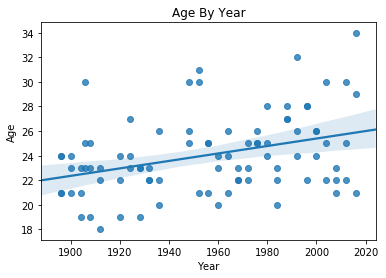

In [17]:
ageplot = sns.regplot(x="Year", y="Age", data=men_winners)
ageplot.set_title('Age By Year')
ageplot.set_xlabel('Year')
ageplot.set_ylabel('Age')
ageplot

The 3 plots above look at Heigh,Weight and Age across Time. We see that as the sport is gets more competitive the athletes are coming in heavier and taller as this could give them a slight edge. What was suprising to see is that this pattern also applies for age. As the years go by, training methods and healthcare is improving, allowing older athletes to compete and do well in the olympics.

In [45]:
men_winners.groupby('Team').size().reset_index(name='Medal Count').sort_values(by=['Medal Count'],ascending=False)

,Team,Medal Count
17,United States,41
6,Great Britain,8
8,Jamaica,8
3,Canada,6
16,Trinidad and Tobago,4
5,Germany,4
0,Australia,3
4,Cuba,2
15,Soviet Union,2
9,Namibia,2


Looking at the plot above although we see that out of the 206 participating countries only 18 countries have won medals. 41 of the 88 have gone to the USA, showing that they are a great team for the Men's 100m across olympic history.

In [48]:
men_recent_winners = men_winners[men_winners.Year > 1992]
men_recent_winners

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
12653,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold
22991,12086,Yohan Blake,M,22.0,180.0,80.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Silver
24711,12946,Ato Jabari Boldon,M,22.0,176.0,75.0,Trinidad and Tobago,TTO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Bronze
24713,12946,Ato Jabari Boldon,M,26.0,176.0,75.0,Trinidad and Tobago,TTO,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 100 metres,Silver
24877,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold
24880,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Gold
24883,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Gold
50819,26135,Andre De Grasse,M,21.0,176.0,70.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Bronze
56242,28811,Walter Dix,M,22.0,175.0,80.0,United States,USA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Bronze
72621,36933,"Frank ""Frankie"" Fredericks",M,28.0,180.0,73.0,Namibia,NAM,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Silver


In [49]:
men_recent_winners.groupby('Team').size().reset_index(name='Medal Count').sort_values(by=['Medal Count'],ascending=False)

,Team,Medal Count
6,United States,6
2,Jamaica,4
5,Trinidad and Tobago,3
1,Canada,2
0,Barbados,1
3,Namibia,1
4,Portugal,1


If we look at the subset of winners in this event in the recent years we see that the difference between Jamaica and USA is much smaller, showing that they have been getting more medal winners in this category in recent years.